In [23]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [24]:
df=pd.read_csv('Iris.csv')

In [25]:
X= df.drop(['Id', 'Species'], axis=1)
Y = df[['Species']]

In [26]:
d={'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}

In [27]:
Y['Species'] = Y['Species'].map(d)

/home/vagrant/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [29]:
X_norm = normalize(X)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_norm,Y,test_size=0.3)

In [31]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
y_test.head()

,Species
0,0
46,0
143,2
30,0
140,2


In [32]:
sample_result=[]
MachineLearningAlgo=[]
X=['LinearSVC','DecisionTreeClassifier','KNeighborsClassifier','SVC','GradientBoostingClassifier','RandomForestClassifier']
Z=[LinearSVC(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GradientBoostingClassifier(),RandomForestClassifier()]

In [33]:
for model in Z:
    model.fit(x_train,y_train)      ## training the model this could take a little time
    accuracy=model.score(x_test,y_test)    ## comparing result with the test data set
    MachineLearningAlgo.append(accuracy) 
    ## saving the accuracy

/home/vagrant/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vagrant/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/vagrant/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vagrant/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explici

/home/vagrant/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/vagrant/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/vagrant/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/vagrant/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/vagrant/.local/lib/python3.6/site-packages/ipykernel_launcher.

Text(0.5, 1.0, 'Accuracy Scores for Values of k of k-Nearest-Neighbors')

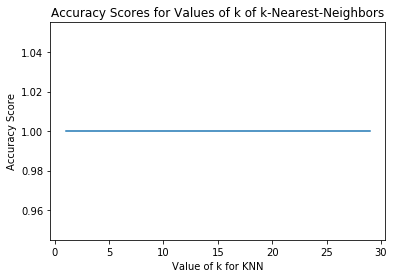

In [36]:
from sklearn import metrics
klist = list(range(1,30))
scores = []
for k in klist:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(klist, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')


In [34]:
d={'Accuracy':MachineLearningAlgo,'Algorithm':X}
df1=pd.DataFrame(d)

In [35]:
df1

,Accuracy,Algorithm
0,0.955556,LinearSVC
1,1.000000,DecisionTreeClassifier
2,1.000000,KNeighborsClassifier
3,1.000000,SVC
4,1.000000,GradientBoostingClassifier
5,1.000000,RandomForestClassifier


In [37]:
## now using voting classifier
lsvc=LinearSVC()
dtc=DecisionTreeClassifier()
knnc=KNeighborsClassifier()
svc=SVC()
gbc=GradientBoostingClassifier()
rfc=RandomForestClassifier()


In [38]:
voting_clf = VotingClassifier(
estimators=[('lsvc', lsvc), ('dtc', dtc), ('knnc', knnc), ('svc', svc), ('gbc', gbc), ('rfc', rfc)],
voting='hard'
)

In [39]:
voting_clf.fit(x_train, y_train)

/home/vagrant/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vagrant/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vagrant/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/vagrant/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will chan

VotingClassifier(estimators=[('lsvc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)), ('dtc', DecisionTreeClassifier(class_weight=None, criterion='g...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [40]:
ac=[]
al=[]
from sklearn.metrics import accuracy_score
for clf in (lsvc, dtc, knnc,svc,gbc,rfc,voting_clf):
    al.append(clf.__class__.__name__)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    ac.append(accuracy_score(y_test, y_pred))
    

/home/vagrant/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vagrant/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/vagrant/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vagrant/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explici

LinearSVC 0.9555555555555556
DecisionTreeClassifier 1.0
KNeighborsClassifier 1.0
SVC 1.0
GradientBoostingClassifier 1.0
RandomForestClassifier 1.0


/home/vagrant/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/vagrant/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/vagrant/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vagrant/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_

VotingClassifier 1.0


In [41]:
voting_clf.predict([[6, 3, 4, 2]])

array([2])

In [42]:
filename = 'finalized_model.pickle'

In [43]:
import pickle